# Keylogger detection

https://www.kaggle.com/datasets/subhajournal/keylogger-detection

About Dataset
Keylogger is a type of spyware which are used to record the keystrokes that are done by the users. in most cases, cybercriminals use to employ keyloggers to observe the keystrokes of the victim and take the information from their computer or other computing devices. The keyloggers are generally of two categories. The first category of keyloggers is injected into the user device to steal the information through the keystrokes. In that case, cybercriminals mainly emphasized on the stealing of the credentials like user IDs and passwords that they use to type to log in to any website or any application. Every keystroke is recorded by the keyloggers and sent to the cybercriminals. In this process, cybercriminals use to steal confidential information through the keylogger.

PLANNING:
- INTRO - short dataset description.
- EDA - shape, dtypes, missing, class balance, sample rows, correlations.
- PREPARING DATA - drop useless columns, fix dtype issues, parse timestamps, coerce numerics, encode label.
- DATA SPLITTING - splitting training and testing data.
- RESULTS - early results.
- PREPARING MODELS - prepare hyperparameter, baseline models., baseline models.
- RESULTS WITH MULTIPLES MODELS- metrics (precision/recall/f1), confusion matrix.
- BALANCING - try balancing and compare.
- RESULTS (after balancing) - compare metrics.
- CONCLUSION - state best model, tradeoffs, next steps.

# EDA

## Importamos las librerías necesarias y cargamos el dataset

In [2]:
import pandas as pd
from pathlib import Path

base_dir = Path.cwd()
csv_file_path = base_dir.parent.parent / "data" / "keylogger_detection" / "Keylogger_Detection_sample.csv"
data = pd.read_csv(csv_file_path, low_memory=False, index_col=0)
# Para hacer más rápido el procesamiento, tomamos una muestra del dataset
df = data.sample(n=1000, random_state=42)
df.head(1)

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
Flow ID,,,,,,,,,,,,,,,,,,,,,
172.217.11.34-10.42.0.211-443-32906-6,10.42.0.211,32906.0,172.217.11.34,443.0,6.0,12/07/2017 02:05:31,4508467.0,2.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Keylogger


## Realizamos un analisis exploratorio sobre los datos

### Exploramos la forma general del dataset

In [3]:
# Realizamos un analysis exploratorio sobre los datos
n = 5
print("Shape:", df.shape)
print("\nColumns and dtypes:")
print(df.dtypes)
print("\nNumeric summary (describe):")
display(df.describe().T)

Shape: (1000, 84)

Columns and dtypes:
 Source IP            object
 Source Port         float64
 Destination IP       object
 Destination Port    float64
 Protocol            float64
                      ...   
Idle Mean            float64
 Idle Std            float64
 Idle Max            float64
 Idle Min            float64
Class                 object
Length: 84, dtype: object

Numeric summary (describe):


,count,mean,std,min,25%,50%,75%,max
Source Port,1000.0,3.815298e+04,1.877217e+04,0.0,34250.75,42899.5,51987.25,6.490400e+04
Destination Port,1000.0,6.729693e+03,1.652872e+04,0.0,80.00,443.0,443.00,6.096000e+04
Protocol,1000.0,7.806000e+00,4.163616e+00,0.0,6.00,6.0,6.00,1.700000e+01
Flow Duration,1000.0,1.129487e+07,2.334697e+07,2.0,39036.00,471797.5,10096081.50,1.199892e+08
Total Fwd Packets,1000.0,7.618000e+00,2.790492e+01,1.0,1.00,2.0,6.00,7.050000e+02
...,...,...,...,...,...,...,...,...
Active Min,1000.0,1.704751e+05,1.716989e+06,0.0,0.00,0.0,0.00,4.993167e+07
Idle Mean,1000.0,4.599871e+06,1.548024e+07,0.0,0.00,0.0,0.00,1.145099e+08
Idle Std,1000.0,4.484078e+05,3.680408e+06,0.0,0.00,0.0,0.00,4.708189e+07
Idle Max,1000.0,4.972753e+06,1.636404e+07,0.0,0.00,0.0,0.00,1.145099e+08


### Verificamos valores nulos

In [4]:
# Resumen de valores nulos

missing_counts = df.isna().sum()
missing_percent = 100 * missing_counts / len(df)
missing_summary = pd.concat([missing_counts, missing_percent], axis=1)
missing_summary.columns = ["nulos", "porcentaje"]
print("\nNulos por columna (n y %):")
display(missing_summary.sort_values("nulos", ascending=False).head(20))


Nulos por columna (n y %):


,nulos,porcentaje
Source IP,0,0.0
Source Port,0,0.0
Destination IP,0,0.0
Destination Port,0,0.0
Protocol,0,0.0
Timestamp,0,0.0
Flow Duration,0,0.0
Total Fwd Packets,0,0.0
Total Backward Packets,0,0.0
Total Length of Fwd Packets,0,0.0


Revisamos su distribution

Counts:
Class
Benign       620
Keylogger    380
Name: count, dtype: int64

Percent:
Class
Benign       62.0
Keylogger    38.0
Name: count, dtype: float64


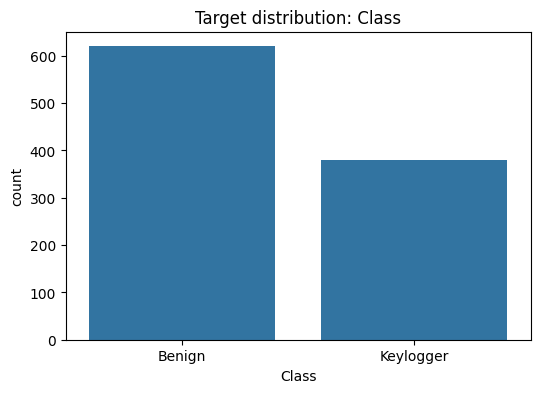

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

target_col = "Class"
figsize = (6, 4)

# Muestra los conteos y porcentajes para la variable binaria objetivo

vc = df[target_col].value_counts(dropna=False)
pct = (vc / len(df) * 100).round(2)
print("Counts:")
print(vc)
print("\nPercent:")
print(pct)

plt.figure(figsize=figsize)
sns.barplot(x=vc.index.astype(str), y=vc.values)
plt.title(f"Target distribution: {target_col}")
plt.ylabel("count")
plt.xlabel(target_col)
plt.show()

# PREPARING DATA

In [ ]:
# Hacemos una copia del DataFrame original para no modificar el raw
df_clean = df.copy()

# Eliminamos filas con valores nulos
df_clean = df_clean.dropna()

# Verificamos que no queden valores nulos
df_clean.nunique().sort_values()

# Quitamos espacios en los nombres de las columnas
df_clean.columns = df_clean.columns.str.strip()

# Analizamos el tipo de columnas en busca de columnas que no sean numéricas o apropiadas para el análisis
df_clean.keys()

Index(['Source IP', 'Source Port', 'Destination IP', 'Destination Port',
       'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packe

In [ ]:
# Eliminamos columnas irrelevantes
cols_to_drop = ["Source IP", "Destination IP", "Timestamp", "Fwd Header Length.1"]
df_clean = df_clean.drop(columns=cols_to_drop)

In [ ]:
# Revisar columnas constantes
constant_cols = [c for c in df_clean.columns if df_clean[c].nunique() <= 1]
df_clean = df_clean.drop(columns=constant_cols)

In [ ]:
# Revisar tipos y columnas mixtas
df_clean.dtypes.value_counts()

float64    67
object      1
Name: count, dtype: int64

Nuestro objetivo es eliminar los datos innecesarios y la información no numérica, actualmente tenemos 66 valores numéricos y 3 object.

In [ ]:
# Para identificar columnas no numéricas usamos:
df_clean.select_dtypes(include=['object']).columns.tolist()

['Class']

revisamos columnas para identificar posibles errores

In [ ]:
df_clean["Packet Length Std"].head(10)

Flow ID
172.217.11.34-10.42.0.211-443-32906-6       0.000000
10.42.0.42-54.230.36.66-36839-443-6         0.000000
10.42.0.211-69.90.153.133-52092-443-6       0.000000
172.217.6.232-10.42.0.211-443-60449-6     269.302804
10.42.0.42-64.71.142.96-50715-443-6       658.790730
10.42.0.151-104.69.158.16-43938-443-6     480.745590
10.42.0.211-10.42.0.1-32190-53-17          31.176915
10.42.0.151-52.84.134.181-50523-443-6       0.000000
10.42.0.211-23.194.181.179-38706-443-6      0.000000
172.217.12.170-10.42.0.151-443-43973-6    449.642794
Name: Packet Length Std, dtype: float64

valores numéricos mal interpretados por pandas, podemos transformarlos

In [ ]:
df_clean["Packet Length Std"] = pd.to_numeric(df_clean["Packet Length Std"], errors="coerce") 

In [ ]:
# finalmente solo necesitamos modificar la columna Class a valores binarios 0 y 1
df_clean["Class"] = df_clean["Class"].map({"Benign": 0, "Keylogger": 1})

In [ ]:
# nuestro dataset limpio
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 172.217.11.34-10.42.0.211-443-32906-6 to 199.16.156.107-10.42.0.151-443-37127-6
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Source Port                  1000 non-null   float64
 1   Destination Port             1000 non-null   float64
 2   Protocol                     1000 non-null   float64
 3   Flow Duration                1000 non-null   float64
 4   Total Fwd Packets            1000 non-null   float64
 5   Total Backward Packets       1000 non-null   float64
 6   Total Length of Fwd Packets  1000 non-null   float64
 7   Total Length of Bwd Packets  1000 non-null   float64
 8   Fwd Packet Length Max        1000 non-null   float64
 9   Fwd Packet Length Min        1000 non-null   float64
 10  Fwd Packet Length Mean       1000 non-null   float64
 11  Fwd Packet Length Std        1000 non-null   float64
 12  Bwd Packet 

# DATA SPLITTINGG

Separamos nuestro dataset en datos que serán usados para entrenamiento y para testing

In [ ]:
from sklearn.model_selection import train_test_split

X = df_clean.iloc[:,:-1].values
y = df_clean['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=15, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 67), (300, 67), (700,), (300,))

# RESULTS

Con todos los elementos necesarios, podemos realizar el entrenamiento y predicción sobre el conjunto de datos.

In [ ]:
# Realizamos el entrenamiento con un modelo de clasificación simple

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
# Realizamos la predicción sobre el conjunto de test
y_pred = clf.predict(X_test)

In [ ]:
# Verificamos los resultados obtenidos
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68       186
           1       0.41      0.30      0.35       114

    accuracy                           0.57       300
   macro avg       0.52      0.52      0.51       300
weighted avg       0.55      0.57      0.55       300



# PREPARING MULTIPLE MODELS

Con el objetivo de encontrar el modelo que mejor se ajusta a nuestro problema configuraremos distintos modelos ajustando distintos hyperparametros.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
### DUMMY (baseline)

param_grid_dm = {
    'strategy': ['most_frequent', 'stratified', 'uniform']
}

scoring = 'f1'

clf_dm = GridSearchCV(DummyClassifier(), param_grid=param_grid_dm, scoring=scoring, cv=10)

In [ ]:
### DECISION TREE

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

scoring = 'f1'

clf_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_dt, scoring=scoring, cv=10)

In [ ]:
### RANDOM FOREST

param_grid_rf = {
    'n_estimators': [50],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

clf_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf, scoring='f1', cv=10)

In [ ]:
### SUPPORT VECTOR CLASSIFIER

param_grid_svc = {
    'C': [1],          
    'kernel': ['rbf'],
}

clf_svc = GridSearchCV(SVC(), param_grid=param_grid_svc, scoring='f1', cv=10)

In [ ]:
### GAUSSIANNB

param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

clf_nb = GridSearchCV(GaussianNB(), param_grid=param_grid_nb, scoring='f1', cv=10)

In [ ]:
### K-NEIGHBORS

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

clf_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, scoring='f1', cv=10)

Una vez tengamos los modelos creados los agruparemos para luego iterar sobre ellos y comparar sus resultados

In [ ]:
# Agrupamos los clasificadores en un diccionario para luego iterar sobre ellos
classifiers = {
    "Base dummy": clf_dm,
    "Decision Tree": clf_dt, 
    "Random Forest": clf_rf, 
    "Support Vector Classifier": clf_svc, 
    "GaussianNB": clf_nb, 
    "K-neighbors": clf_knn
}

In [ ]:
# Función para entrenar y evaluar múltiples modelos
def train_with_multiples_models(classifiers: dict, X_train, y_train, X_test, y_test):
    for name, clf in classifiers.items():
        print(':::::::::::::::::::::::::::::::::::::::::')
        print(f'Current classifier: {name}')
        print('Training..')
        clf.fit(X_train, y_train)

        print("Mejor combinación de parámetros:")
        print(clf.best_params_)
        
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred, zero_division=0))

# RESULTS WITH MULTIPLE MODELS

Ya realizamos un entrenamiento y predicción utilizando un modelo, esta vez repetiremos ese proceso para todos los modelos que hemos creado.

In [ ]:
train_with_multiples_models(classifiers=classifiers, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

:::::::::::::::::::::::::::::::::::::::::
Current classifier: Base dummy
Training..
Mejor combinación de parámetros:
{'strategy': 'uniform'}
              precision    recall  f1-score   support

           0       0.57      0.42      0.48       186
           1       0.34      0.49      0.40       114

    accuracy                           0.45       300
   macro avg       0.46      0.46      0.44       300
weighted avg       0.49      0.45      0.45       300

:::::::::::::::::::::::::::::::::::::::::
Current classifier: Decision Tree
Training..


Mejor combinación de parámetros:
{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       186
           1       0.39      0.40      0.40       114

    accuracy                           0.53       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.54      0.53      0.53       300

:::::::::::::::::::::::::::::::::::::::::
Current classifier: Random Forest
Training..
Mejor combinación de parámetros:
{'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       186
           1       0.49      0.39      0.43       114

    accuracy                           0.61       300
   macro avg       0.58      0.57      0.57       300
wei

# BALANCING

In [ ]:
df_clean['Class'].value_counts()

Class
0    620
1    380
Name: count, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print("Balanced class distribution (undersampling):")
print(pd.Series(y_resampled).value_counts())

Balanced class distribution (undersampling):
0    266
1    266
Name: count, dtype: int64


In [ ]:
train_with_multiples_models(classifiers=classifiers, X_train=X_resampled, y_train=y_resampled, X_test=X_test, y_test=y_test)

:::::::::::::::::::::::::::::::::::::::::
Current classifier: Base dummy
Training..
Mejor combinación de parámetros:
{'strategy': 'uniform'}
              precision    recall  f1-score   support

           0       0.60      0.49      0.54       186
           1       0.36      0.46      0.41       114

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.47       300
weighted avg       0.51      0.48      0.49       300

:::::::::::::::::::::::::::::::::::::::::
Current classifier: Decision Tree
Training..
Mejor combinación de parámetros:
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.60      0.40      0.48       186
           1       0.36      0.56      0.44       114

    accuracy                           0.46       300
   macro avg       0.48      0.48      0.46       300
weighted avg       0.51      0

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print("Balanced class distribution (oversampling):")
print(pd.Series(y_resampled).value_counts())

Balanced class distribution (oversampling):
0    434
1    434
Name: count, dtype: int64


In [ ]:
train_with_multiples_models(classifiers=classifiers, X_train=X_resampled, y_train=y_resampled, X_test=X_test, y_test=y_test)

:::::::::::::::::::::::::::::::::::::::::
Current classifier: Base dummy
Training..
Mejor combinación de parámetros:
{'strategy': 'uniform'}
              precision    recall  f1-score   support

           0       0.63      0.45      0.53       186
           1       0.39      0.57      0.46       114

    accuracy                           0.50       300
   macro avg       0.51      0.51      0.49       300
weighted avg       0.54      0.50      0.50       300

:::::::::::::::::::::::::::::::::::::::::
Current classifier: Decision Tree
Training..
Mejor combinación de parámetros:
{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       186
           1       0.43      0.41      0.42       114

    accuracy                           0.57       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.57     

# CONCLUSION

Los resultados muestran que los modelos más interpretables y robustos fueron Decision Tree y Random Forest, aunque el desbalance de clases sigue afectando el desempeño en la detección de keyloggers. Se aplicó oversampling para intentar mitigar este efecto, pero todavía persiste cierta dificultad en predecir la clase minoritaria. Este ejercicio evidencia la importancia de la limpieza de datos, la selección de características y la consideración de balance de clases al abordar problemas de clasificación. 

Para trabajos futuros, se recomienda explorar técnicas de balanceo más avanzadas, ajuste fino de hiperparámetros y análisis de importancia de variables para mejorar la detección de amenazas.